# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
#The files hold information on states, totalpop, ethnicity, income, genderpop. Genderpop will need to be seperated into popmale and popfemale. 
#We will need to inspect the dtypes, and change to the appropriate type to run analysis on.

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

#Collating all of the files into one file
files = glob.glob('states*.csv')

df_list = []
for file in files:
    df_list.append(pd.read_csv(file))

us_census = pd.concat(df_list)

us_census.head()
                   
    

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
us_census.columns
us_census.dtypes

#The ethnicity, income, and genderpop dtypes will need to be changed to numeric. The GenderPop variable will need to be seperated into mpop and fpop.

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
print(us_census.head())
#Genderpop needs to be seperated to male pop and female pop.
#The ethnicity and income columns are objects because they include the % and $ signs. We will need to use regex to remove these signs and then convert using the pd.to_numeric method.

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
us_census['Income'] = us_census['Income'].str.replace('[$,]','',regex=True).astype(float)
print(us_census['Income'])

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
Name: Income, dtype: float64


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
string_split = us_census['GenderPop'].str.split('_')
us_census['MalePop'] = string_split.str.get(0)
us_census['FemalePop'] = string_split.str.get(1)
us_census = us_census.drop('GenderPop', axis=1)
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income    MalePop  FemalePop  
0   0.03%  43296.36   2341093M   2489527F  
1   1.06%  70354.74    384160M    349215F  
2   0.17%  54207.82   3299088M   3342840F  
3   0.15%  41935.63   1451913M   1506295F  
4   0.35%  67264.78  19087135M  19334329F  


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
us_census['MalePop'] = us_census['MalePop'].str.replace('M','')
us_census['FemalePop'] = us_census['FemalePop'].str.replace('F','')
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income   MalePop FemalePop  
0   0.03%  43296.36   2341093   2489527  
1   1.06%  70354.74    384160    349215  
2   0.17%  54207.82   3299088   3342840  
3   0.15%  41935.63   1451913   1506295  
4   0.35%  67264.78  19087135  19334329  


In [8]:
us_census[['MalePop', 'FemalePop']] = us_census[['MalePop', 'FemalePop']].apply(pd.to_numeric)
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
MalePop         int64
FemalePop     float64
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

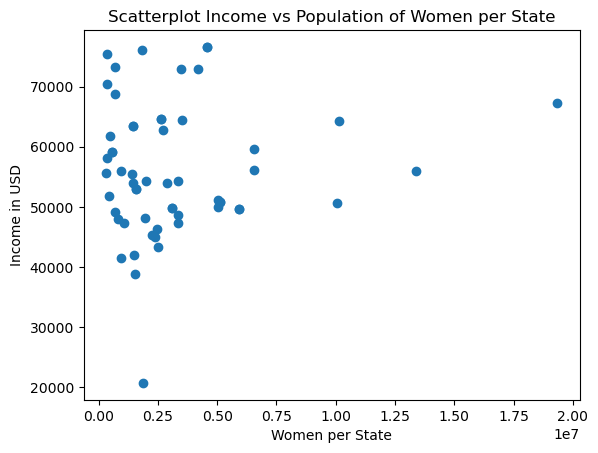

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(us_census['FemalePop'], us_census['Income'])
plt.xlabel('Women per State')
plt.ylabel('Income in USD')
plt.title('Scatterplot Income vs Population of Women per State')
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [10]:
print(us_census['FemalePop'])
us_census['FemalePop'] = us_census['FemalePop'].fillna(us_census['TotalPop'] - us_census['MalePop'])
print(us_census['FemalePop'])

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: FemalePop, dtype: float64
0     24

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [11]:
us_census.duplicated(subset=us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

11. Drop those duplicates using the `.drop_duplicates()` function.

In [12]:
us_census = us_census.drop_duplicates(subset=us_census.columns[1:])

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

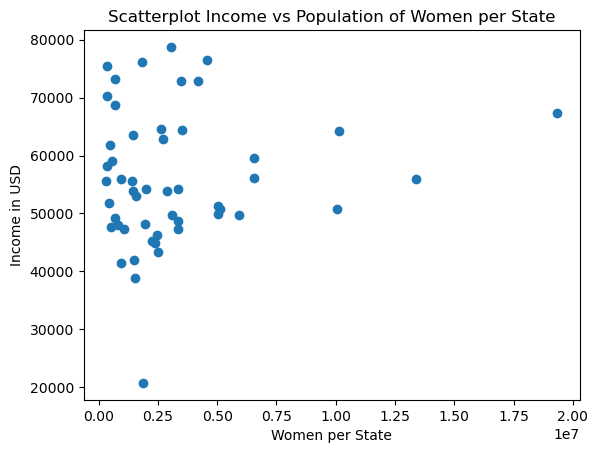

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(us_census['FemalePop'], us_census['Income'])
plt.xlabel('Women per State')
plt.ylabel('Income in USD')
plt.title('Scatterplot Income vs Population of Women per State')
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [14]:
us_census.columns
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329.0


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [15]:
#Removing the % sign and converting the dtype to a float
Cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for Column in Cols:
    us_census[Column] = us_census[Column].str.replace('%','').astype(float)

us_census.head
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
MalePop         int64
FemalePop     float64
dtype: object

In [16]:
us_census.duplicated(subset=us_census.columns[1:])
us_census.isna()

Cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for Column in Cols:
    other_cols = Cols.copy()
    other_cols.remove(Column)
    us_census[Column] = us_census[Column].fillna(100 - (us_census[other_cols].sum(axis=1)))
    


In [32]:
print(us_census)

   Unnamed: 0                 State  TotalPop  Hispanic  White  Black  Native  \
0           0               Alabama   4830620      3.75  61.88  31.25    0.45   
1           1                Alaska    733375      5.91  60.91   2.85   16.39   
2           2               Arizona   6641928     29.57  57.12   3.85    4.36   
3           3              Arkansas   2958208      6.22  71.14  18.97    0.52   
4           4            California  38421464     37.29  40.22   5.68    0.41   
5           5              Colorado   5278906     20.78  69.90   3.55    0.57   
1           1           Connecticut   3593222     15.60  67.68  10.35    0.13   
2           2              Delaware    926454      8.82  64.63  20.74    0.26   
3           3  District of Columbia    647484      9.17  33.10  51.78    0.20   
4           4               Florida  19645772     21.34  59.08  15.17    0.21   
5           5               Georgia  10006693      8.42  54.29  32.09    0.19   
1           1               

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

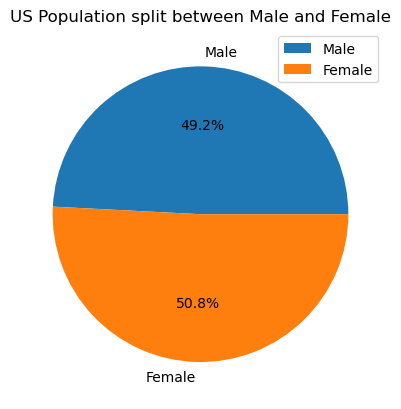

<Figure size 640x480 with 0 Axes>

In [52]:
#US Population split between Male and Female
us_pop = us_census['TotalPop'].sum(axis=0)
male_pop_pct = (us_census['MalePop'].sum(axis=0).astype(float))/us_pop
female_pop_pct = (us_census['FemalePop'].sum(axis=0))/us_pop

values = [male_pop_pct, female_pop_pct]
labels = ['Male', 'Female'] 
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('US Population split between Male and Female')
plt.legend()
plt.show()
plt.clf()

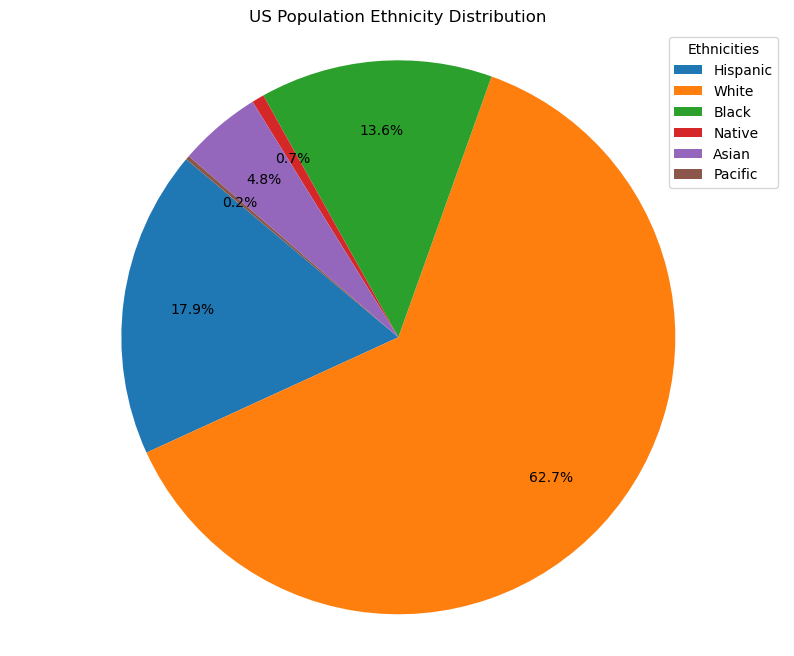

<Figure size 640x480 with 0 Axes>

In [76]:
Cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
#For each ethnicity, multiply the percent by the totalpop, then sum the results across the entire column.

Ethnicity_Totals = {}
for column in Cols:
    Ethnicity_Totals[column] = (us_census[column]/100*us_census['TotalPop']).sum()



values = list(Ethnicity_Totals.values())
labels = list(Ethnicity_Totals.keys())
plt.figure(figsize=(10,8))
plt.pie(values, autopct='%1.1f%%', startangle=140, pctdistance=.75)
plt.title('US Population Ethnicity Distribution')
plt.legend(labels=labels, title='Ethnicities', loc='upper right')
plt.axis('equal')
plt.show()
plt.clf()